# data reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score
import os
from itertools import cycle
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, linear_model, metrics, datasets, multiclass, svm
import seaborn as sns
import numpy.random as nr
import nltk
import re

In [2]:
Data = pd.read_csv('consumer_complaints 2.csv', encoding='latin-1')

/var/folders/wy/7h8pdyps2lvf0lt3z0q5kz6r0000gn/T/ipykernel_82504/292266612.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('consumer_complaints 2.csv', encoding='latin-1')


In [3]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

/var/folders/wy/7h8pdyps2lvf0lt3z0q5kz6r0000gn/T/ipykernel_82504/1149115581.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
Data

date_received           product                  sub_product  \
0       08/30/2013    Mortgage          Other mortgage                
1       08/30/2013    Mortgage          Other mortgage                
2       08/30/2013    Credit reporting  NaN                           
3       08/30/2013    Student loan      Non-federal student loan      
4       08/30/2013    Debt collection   Credit card                   
...            ...                ...           ...                   
555952  07/01/2014    Mortgage          Other mortgage                
555953  07/01/2014    Mortgage          Other mortgage                
555954  07/10/2012    Mortgage          Conventional fixed mortgage   
555955  04/14/2015    Debt collection   I do not know                 
555956  08/14/2014    Debt collection   I do not know                 

                                           issue  \
0       Loan modification,collection,foreclosure   
1       Loan servicing, payments, escrow account   
2       Incorrect information on credit report     
3       Repaying your loan                         
4       False statements or representation         
...                                    ...         
555952  Loan modification,collection,foreclosure   
555953  Loan servicing, payments, escrow account   
555954  Loan modification,collection,foreclosure   
555955  Communication tactics                      
555956  Cont'd attempts collect debt not owed      

                                sub_issue consumer_complaint_narrative  \
0       NaN                                NaN                           
1       NaN                                NaN                           
2       Account status                     NaN                           
3       Repaying your loan                 NaN                           
4       Attempted to collect wrong amount  NaN                           
...                                   ...  ...                           
555952  NaN                                NaN                           
555953  NaN                                NaN                           
555954  NaN                                NaN                           
555955  Frequent or repeated calls         NaN                           
555956  Debt is not mine                   NaN                           

       company_public_response                          company state zipcode  \
0       NaN                     U.S. Bancorp                     CA    95993    
1       NaN                     Wells Fargo & Company            CA    91104    
2       NaN                     Wells Fargo & Company            NY    11764    
3       NaN                     Navient Solutions, Inc.          MD    21402    
4       NaN                     Resurgent Capital Services L.P.  GA    30106    
...     ...                                                 ...  ..      ...    
555952  NaN                     Bank of America                  NaN   NaN      
555953  NaN                     Residential Credit Solutions     NaN   NaN      
555954  NaN                     BB&T Financial                   NaN   NaN      
555955  NaN                     Global Recovery Group            NaN   NaN      
555956  NaN                     CCS Financial Services, Inc.     NaN   NaN      

                                 tags consumer_consent_provided submitted_via  \
0       NaN                            NaN                       Referral       
1       NaN                            NaN                       Referral       
2       NaN                            NaN                       Postal mail    
3       NaN                            NaN                       Email          
4       NaN                            NaN                       Web            
...     ...                            ...                       ...            
555952  NaN                            NaN                       Referral       
555953  Older Ameri

In the above data we have to just classify products based on narrative given by customers so, we need 2 column i.e. product and consumer_complaint_narrative

# Data understanding

In [5]:
pd.notnull(Data['consumer_complaint_narrative']).value_counts()

False    489151
True     66806 
Name: consumer_complaint_narrative, dtype: int64

Take data which contain atleast 1 word which is to useful while model building, From the above output it shows 66806 are not null rows so we have to take only those rows.

In [6]:
Data = Data[['product','consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]
Data

product  \
190126  Debt collection    
190135  Consumer Loan      
190155  Mortgage           
190207  Mortgage           
190208  Mortgage           
...          ...           
553084  Credit reporting   
553085  Credit reporting   
553086  Payday loan        
553090  Mortgage           
553096  Mortgage           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [7]:
Data.shape

(66806, 2)

In [8]:
# check the distribution of complaint by category
Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service    5711 
Consumer Loan              3678 
Credit card                7929 
Credit reporting           12526
Debt collection            17552
Money transfers            666  
Mortgage                   14919
Other financial service    110  
Payday loan                726  
Prepaid card               861  
Student loan               2128 
Name: consumer_complaint_narrative, dtype: int64

Note: Imbalance Dataset, Other financial service, Money transfers, Payday loan, Prepaid card are having less than 1000 rows denoting imbalance dataset

# Plot Target variable

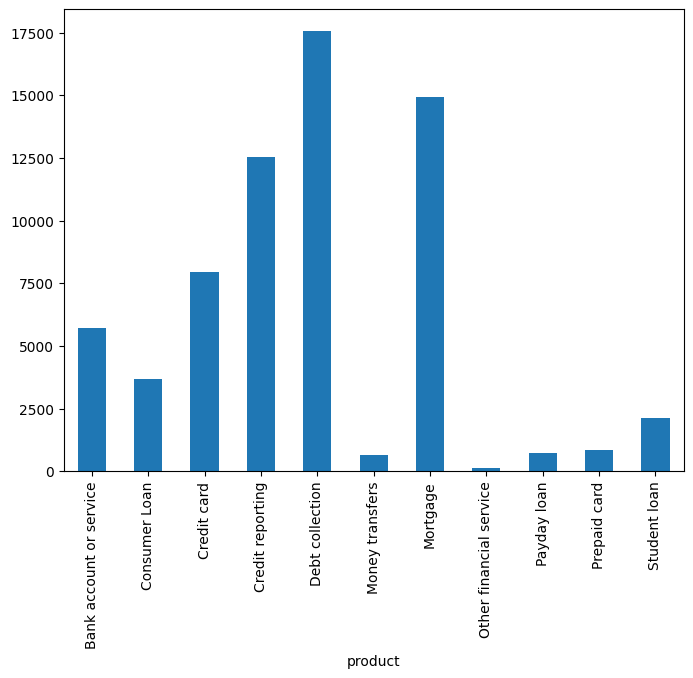

In [9]:
fig = plt.figure(figsize=(8,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar()
plt.show()

# Converting Text to Features
The procedure of converting raw text data into machine understandable format(numbers) is called feature engineering of text data. Machine learning and deep learning algo performance and accuracy is fundamentally dependent on the type of feature engineering techniques used.

# Clean the features

In [10]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
Data['consumer_complaint_narrative'] = Data['consumer_complaint_narrative'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gulipalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Feature column analysis: word clouds

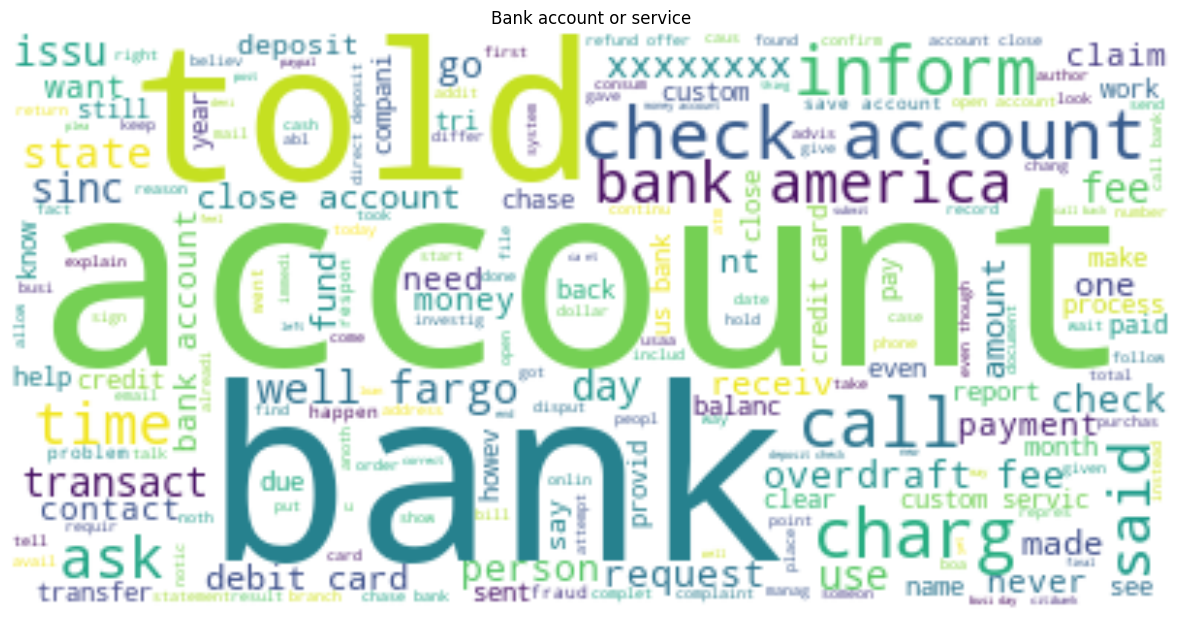

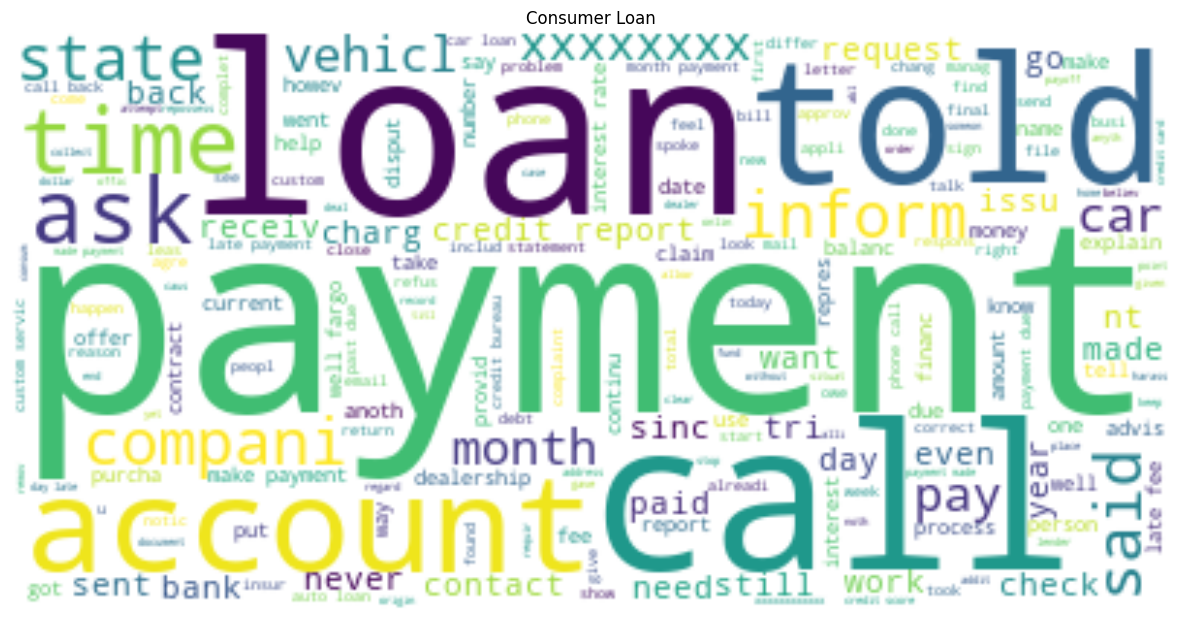

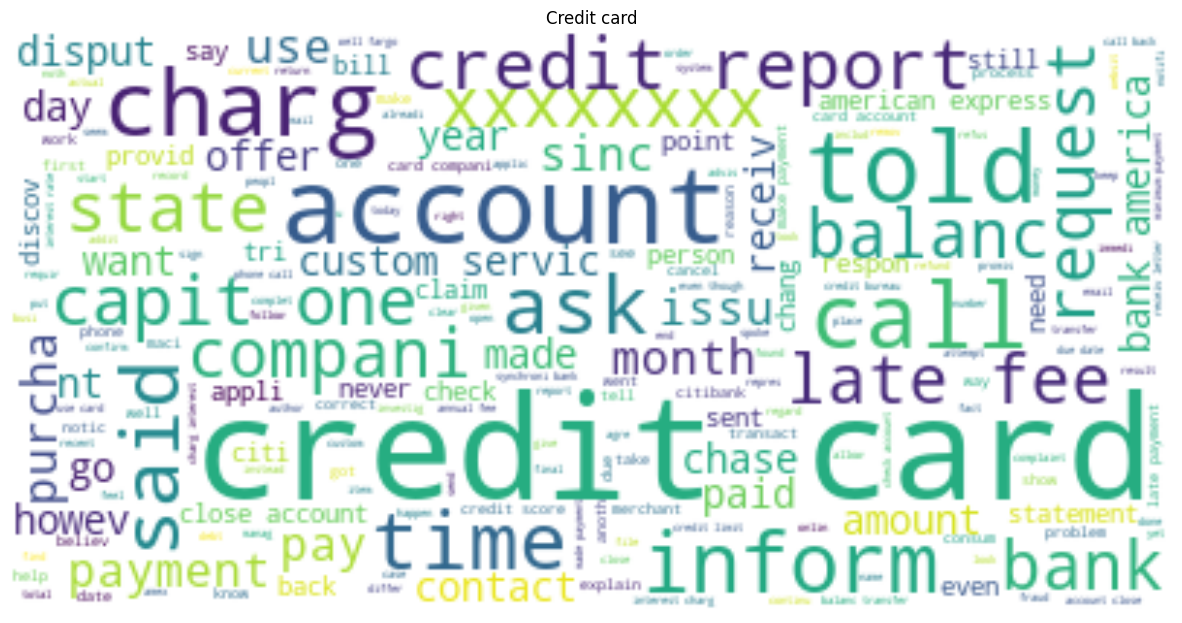

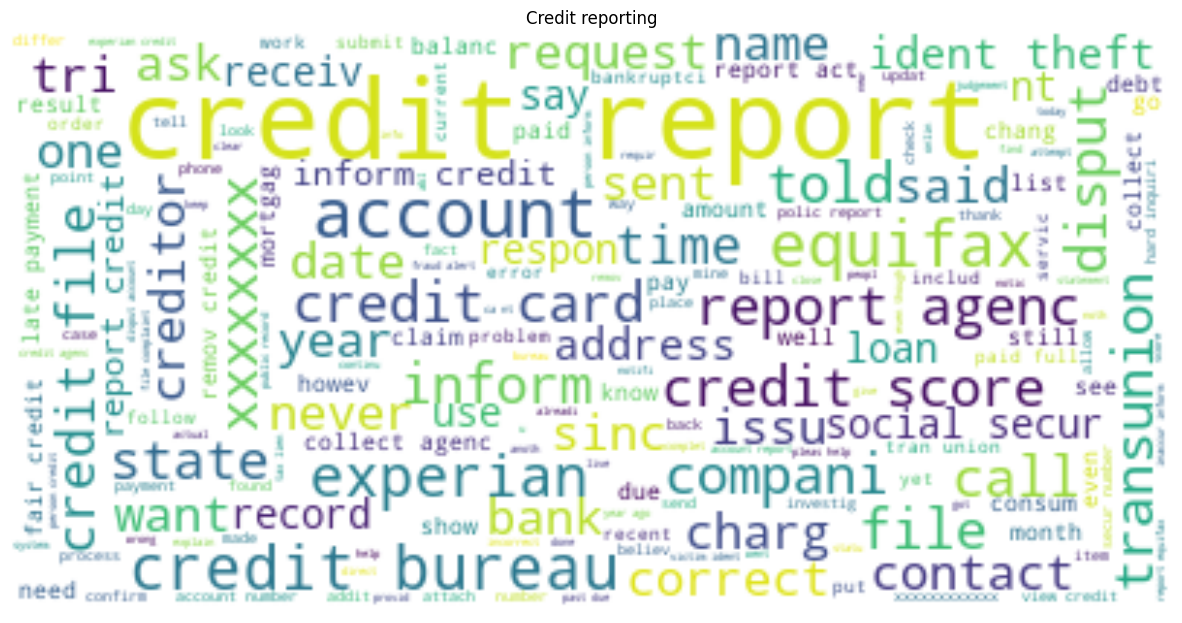

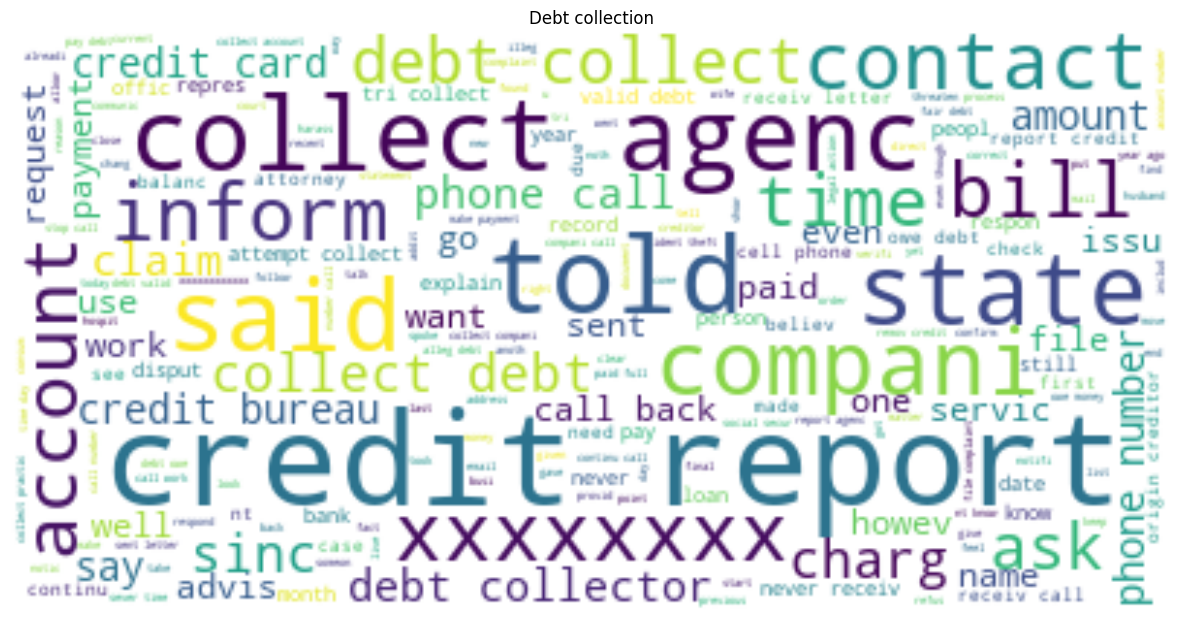

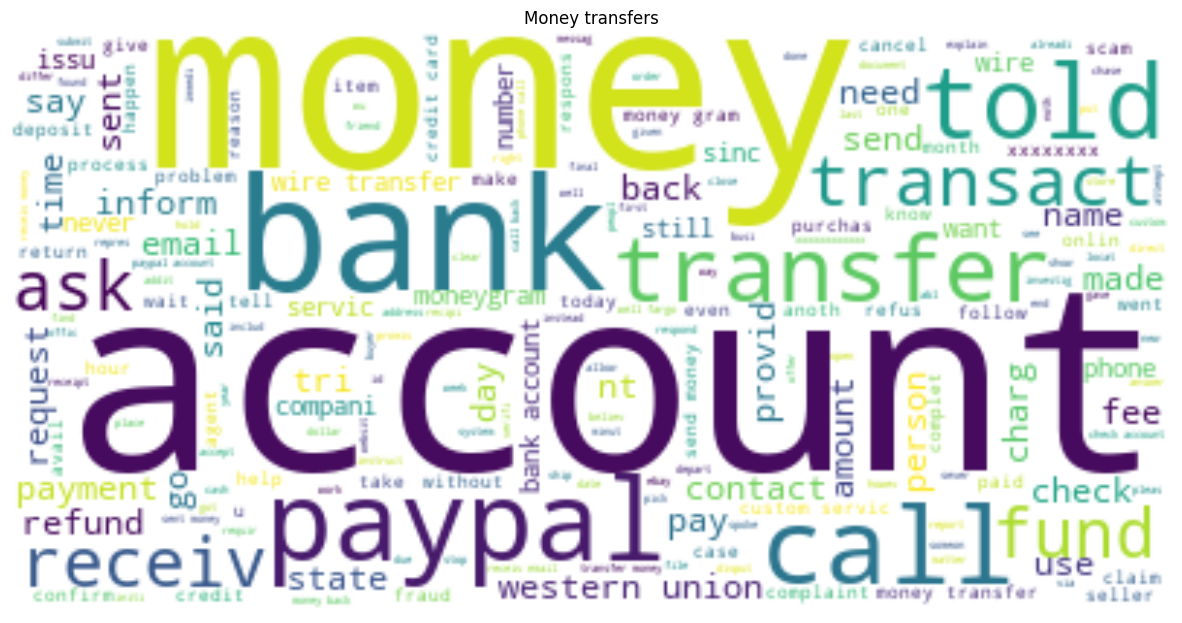

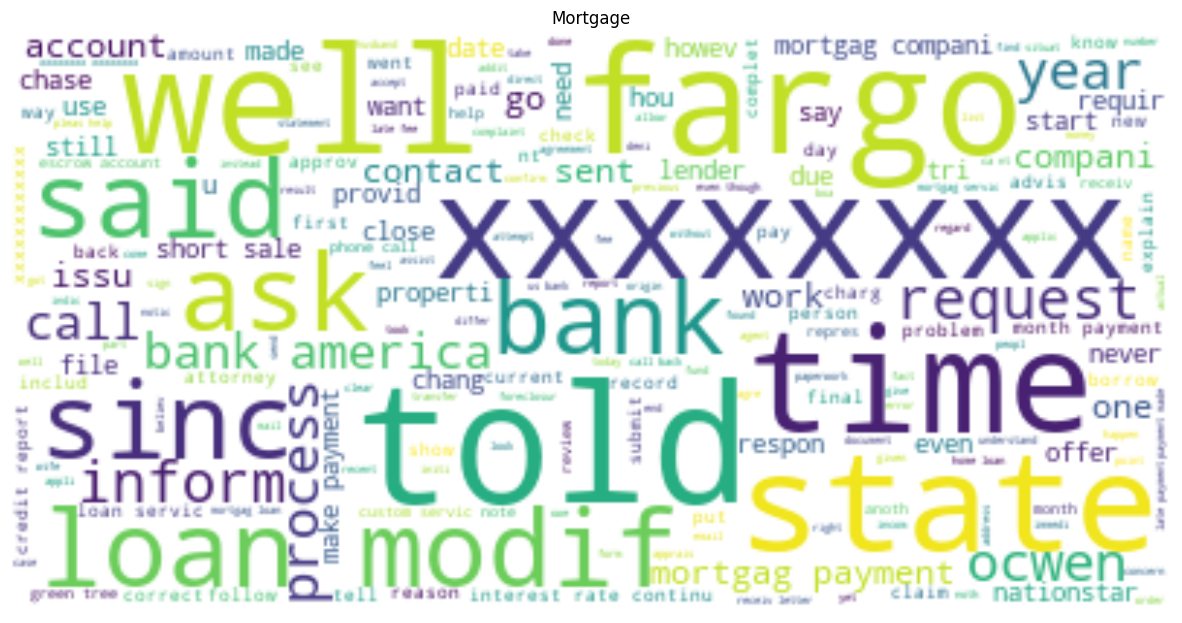

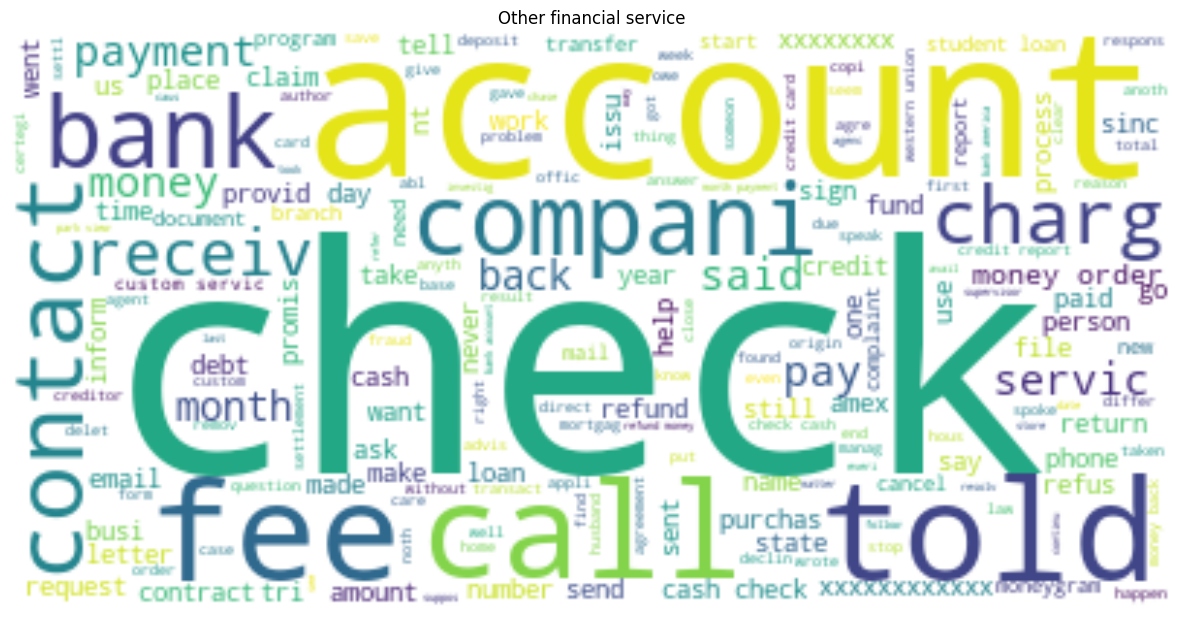

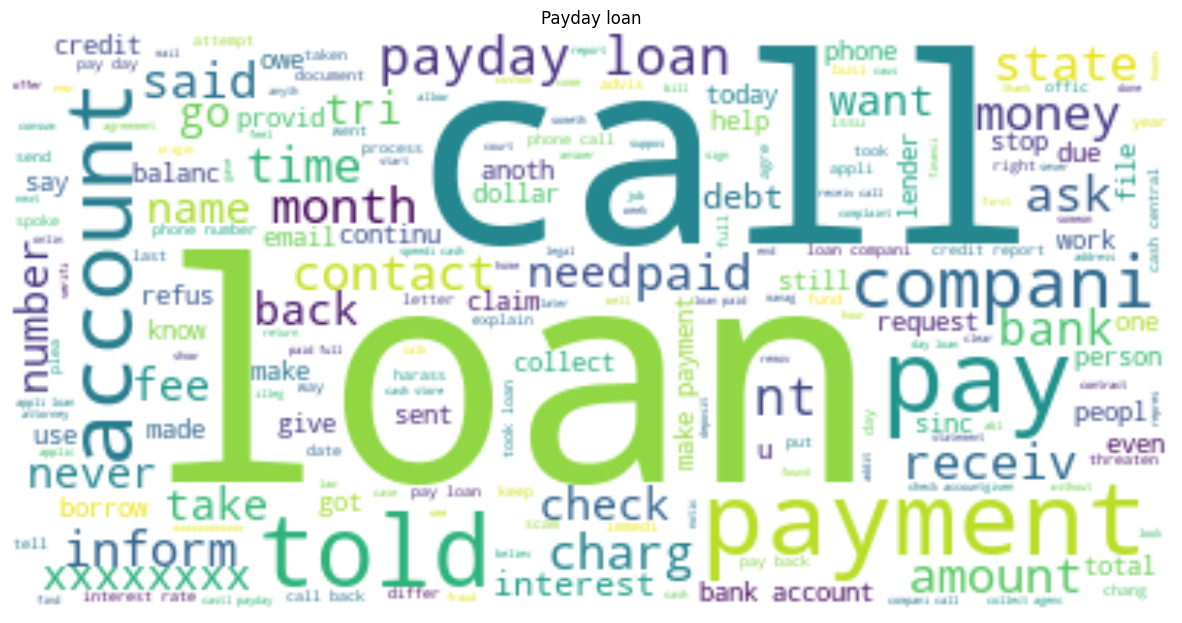

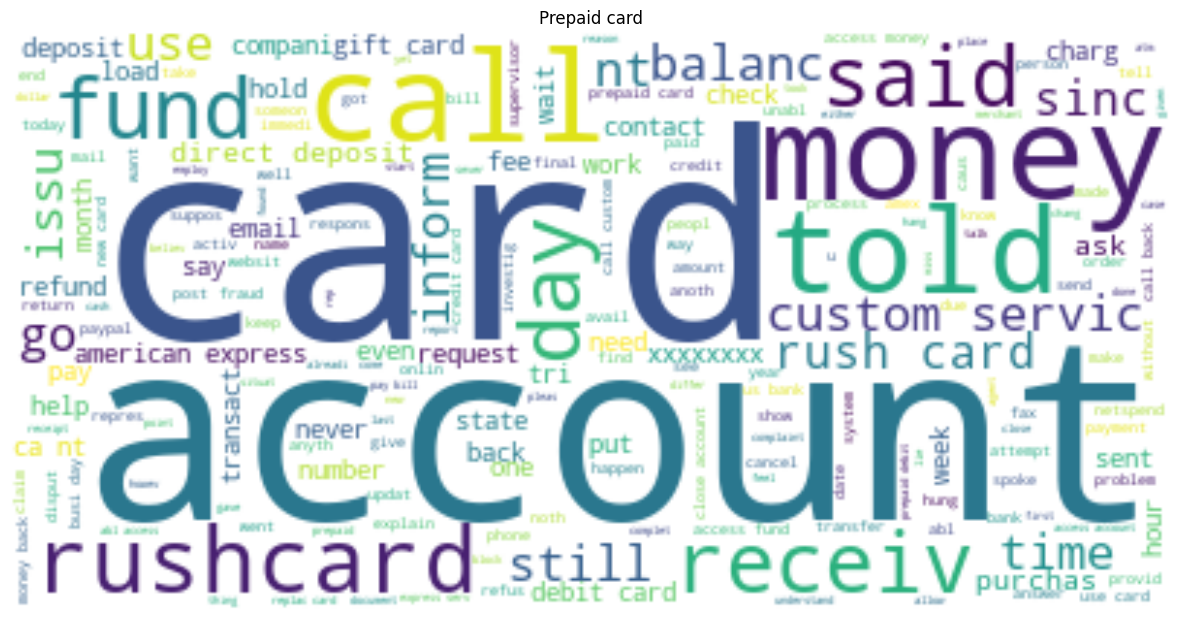

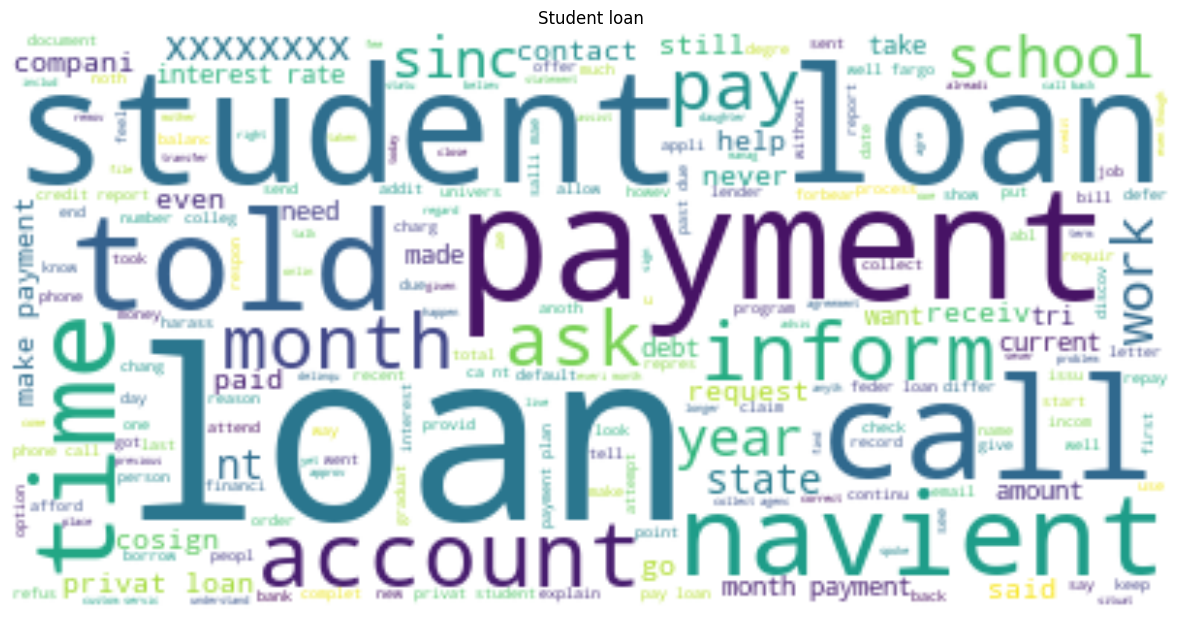

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Group the data by category
grouped_data = Data.groupby('product')

# Define the list of stopwords
stopwords = set(STOPWORDS)
stopwords.add("XXXX")

# Generate a word cloud for each category
for category, group in grouped_data:
    text = " ".join(i for i in group.consumer_complaint_narrative)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(category)
    plt.show()


# TF_IDF Vectorizer
TF_IDF is the most applied feature engineering technique for processing textual kind data by many machine learning expert and data scientist.

Term Frequency(TF): -> Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence. -> TF is basically capturing the importance of the word irrespective of the length of the document. -> ex: a word with the frequency of 3 with the length of sentence being 10 is not the same as when the word length of sentence being 100 words. It should get more importance in the first scenario; that is what TF does.

Inverse Document Frequency(IDF): -> IDF of each word is the log of the ratio of the total number of rows to the number of rows in a particular document in which that word is present. -> IDF will measure the rareness of a term. word like 'a' and 'the' show up in all the documents of corpus, but the rare words is not in all the documents.

TF-IDF is the simplest product of TF and IDF so that both of the drawbacks are addressed, which makes predictions and information retrieval relevant.

In [12]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)    # default {max_df=1.0(float) so its proportion of word contain in all documents,
# simply if a words contain in all the document it is 1.0}, {min_df=1(int) so iteger directly denotes count of words in a document shows atleast 1 word contains in a documents then only it is consider}
tfidf_vect.fit(Data['consumer_complaint_narrative'])
Features = tfidf_vect.transform(Data['consumer_complaint_narrative'])

encoder = preprocessing.LabelEncoder()
Labels1 = encoder.fit_transform(Data['product'])

# Binarize the output
#Labels = np.array(preprocessing.label_binarize(Labels, classes=[0,1,2,3,4,5,6,7,8,9,10]))

In [13]:
print(Features[3], Labels1)

  (0, 4926)	0.19872750052824498
  (0, 3654)	0.11439949953849876
  (0, 3558)	0.11900767367779512
  (0, 3479)	0.19133899510536267
  (0, 3397)	0.07748659787354453
  (0, 3131)	0.11904255428434299
  (0, 3008)	0.18934940728327837
  (0, 2789)	0.1515444792310279
  (0, 2511)	0.12974573193647687
  (0, 2426)	0.09764776696757342
  (0, 2373)	0.1898720885231909
  (0, 2220)	0.06014372043358692
  (0, 1273)	0.08179196517163242
  (0, 1208)	0.2785898758241216
  (0, 1040)	0.07912422150353915
  (0, 1015)	0.18682439659993072
  (0, 684)	0.3675017449822023
  (0, 675)	0.4196629156814672
  (0, 453)	0.5549752943401737
  (0, 366)	0.06616756855832735
  (0, 33)	0.050973399370223965 [4 1 6 ... 8 6 6]


# split the data set 80 and 20 percent

In [14]:
train_x, valid_x,  train_y, valid_y = train_test_split(Data['consumer_complaint_narrative'],Data['product'],test_size=0.2, 
                                                    random_state=42)    # Default it will split 25 by 75% means 25% test case and 75% training cases

In [15]:
print(f"Training data shape: {train_x.shape}, {train_y.shape}  Validation data shape: {valid_x.shape}, {valid_y.shape}")


Training data shape: (53444,), (53444,)  Validation data shape: (13362,), (13362,)


# perform vectorization and transform train and valid sets

In [16]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
#print(train_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)    # default {max_df=1.0(float) so its proportion of word contain in all documents,
# simply if a words contain in all the document it is 1.0}, {min_df=1(int) so iteger directly denotes count of words in a document shows atleast 1 word contains in a documents then only it is consider}
tfidf_vect.fit(Data['consumer_complaint_narrative'])
#print(tfidf_vect.stop_words)
#print(tfidf_vect.vocabulary_)
xtrain_tfidf = tfidf_vect.transform(train_x)

xvalid_tfidf = tfidf_vect.transform(valid_x)
#print(xtrain_tfidf)

# Model building 


# Model 1: simple Logistic Regression
Suppose we are building a linear classifier on word-level TF-IDF vectors. We are using default hyper parameters for the classifier.

In [17]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
def accuracy():
    # checking accuracy
    accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)
    print("Accuracy: ",accuracy)
    print(metrics.classification_report(valid_y,model.predict(xvalid_tfidf), target_names=Data['product'].unique()))

accuracy()

Accuracy:  0.8479269570423589
                         precision    recall  f1-score   support

        Debt collection       0.80      0.80      0.80      1155
          Consumer Loan       0.78      0.64      0.71       746
               Mortgage       0.82      0.81      0.81      1615
            Credit card       0.85      0.86      0.85      2502
       Credit reporting       0.82      0.89      0.85      3496
           Student loan       0.81      0.53      0.64       150
Bank account or service       0.93      0.96      0.94      2941
            Payday loan       0.00      0.00      0.00        21
        Money transfers       0.56      0.25      0.34       153
Other financial service       0.81      0.66      0.73       168
           Prepaid card       0.90      0.81      0.85       415

               accuracy                           0.85     13362
              macro avg       0.73      0.65      0.68     13362
           weighted avg       0.84      0.85      0.84    

/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Examine these results:

The overall accuracy is 0.846. However as just observed this is as somewhat misleading beacuse of some cases like money transfer, payday loan, and other financial service are little misclassified.
The class imbalance is confirmed. 
The precision, recall and F1 all show that Debt collection, Mortgage, Credit card, Credit reporting, Bank account or service, Prepaid card cases are classified reasonably well, but the Consumer Loan, Student loan, Payday loan, Money transfers, Other financial service cases are not. As if those categories are misclassified is will directly cost to bank, beacause after going complaint to unexpected team they will not able to resolve the issues and ticket is going to send to appropriate team so, increases time range and directly impacts to customer satisfaction leads to high risk on customer relationship mangement by bank. since bank fully depends on customers they should not tollerate it.

[[ 923    9   90   24   37   11   39    0    1   21    0]
 [  15  481   37   57  104    1   38    0    8    0    5]
 [  74    8 1309   88  117    1   16    0    0    2    0]
 [  13   26   40 2141  228    0   42    0    2    0   10]
 [  25   45   74  168 3099    0   46    0   17    0   22]
 [  36    1   10    1   12   79    7    0    1    3    0]
 [  19   16   12   37   43    0 2812    0    0    0    2]
 [   4    0    1    1    9    3    2    0    1    0    0]
 [  12   25    3    2   68    1    4    0   38    0    0]
 [  25    0   21    0    9    2    0    0    0  111    0]
 [   3    4    4   11   41    0   15    0    0    0  337]]


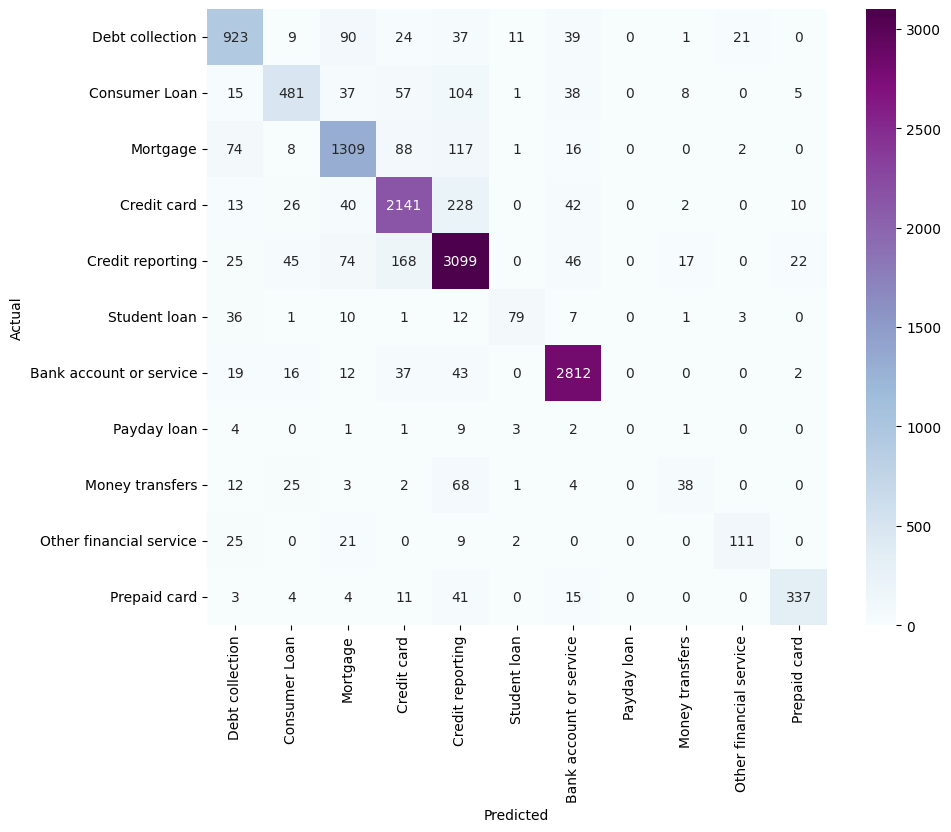

In [29]:
def heat_conf():
    # confusion matrix
    conf_mat = metrics.confusion_matrix(valid_y,model.predict(xvalid_tfidf))
    print(conf_mat)
    # visualizing confusion matrix
    #category_id_df = Data[['product','category_id']].drop_duplicates().sort_values('category_id')
    #category_id_df
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(conf_mat, annot=True,fmt='d',cmap='BuPu',xticklabels=Data['product'].unique(),yticklabels=Data['product'].unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
heat_conf()

In [30]:
 category_id_df = pd.DataFrame()
category_id_df['category'] = Data['product'].unique()
category_id_df['category_id'] = category_id_df.index.values

#print(category_id_df.index.values)
category_to_id = dict(category_id_df[['category_id','category']].values)
category_to_id

{0: 'Debt collection',
 1: 'Consumer Loan',
 2: 'Mortgage',
 3: 'Credit card',
 4: 'Credit reporting',
 5: 'Student loan',
 6: 'Bank account or service',
 7: 'Payday loan',
 8: 'Money transfers',
 9: 'Other financial service',
 10: 'Prepaid card'}

In [31]:
probabilities = model.predict_proba(xvalid_tfidf)
print(probabilities[:15,:])

[[1.45539434e-02 1.53469686e-02 3.24501658e-02 5.11498638e-02
  8.30585444e-01 3.92228169e-03 3.27610158e-02 1.68520209e-03
  4.32407416e-03 3.27097034e-03 9.95007050e-03]
 [2.02980039e-04 2.39671930e-04 3.40176621e-04 1.80208087e-03
  1.75775908e-03 1.02188135e-04 9.94203905e-01 6.25244952e-05
  1.07201373e-04 3.53732479e-05 1.14613930e-03]
 [5.65050537e-02 5.19923586e-02 4.80766268e-01 1.19899410e-02
  3.47414586e-01 2.77258614e-03 1.98366775e-02 1.45250151e-03
  8.25460545e-03 6.59691918e-03 1.24185029e-02]
 [2.02521626e-04 1.68673873e-03 1.39315588e-03 8.52745036e-01
  1.42631470e-01 1.42836195e-04 5.46513680e-04 1.25357842e-04
  1.65413122e-04 8.01107170e-05 2.80845855e-04]
 [8.37270589e-03 1.49758897e-02 6.94530417e-03 6.79532244e-01
  2.18710919e-01 3.84393011e-03 5.35359061e-02 1.68935890e-03
  2.98756121e-03 2.14884764e-03 7.25733341e-03]
 [1.04339259e-03 2.04836421e-02 9.64893761e-01 5.59037273e-04
  1.45707757e-03 1.23070639e-04 3.12723379e-03 1.09408065e-04
  3.01935120e-04

The above shows probablitic approach towards the classification problem, where the highest prob belongs to the perticular class. for ex: see the 1st row it belongs to class 3. its value ranges [0-1]

Now the below code shows that The desion_function() tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it). Based on that information, the estimator then label the examples with the corresponding label.

In [32]:
y_score = model.decision_function(xvalid_tfidf)
print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
print(predictions[:15])

[[-0.03759609  0.0154599   0.76424748  1.21930175  4.00667273 -1.34878453
   0.77378119 -2.19357258 -1.25126002 -1.53037139 -0.41787844]
 [-1.00027662 -0.83411323 -0.48391931  1.18331305  1.15841076 -1.68656869
   7.49631334 -2.17782586 -1.6386752  -2.74742844  0.73077018]
 [ 0.99864309  0.91540977  3.13969423 -0.55161894  2.81483185 -2.01590648
  -0.04815437 -2.66239974 -0.92491571 -1.14908424 -0.51649946]
 [-1.6647036   0.45500193  0.2637766   6.68066561  4.89246918 -2.01385179
  -0.67199093 -2.14437789 -1.86710416 -2.59214063 -1.33774431]
 [-0.45422639  0.12723805 -0.64113773  3.94220118  2.80854735 -1.2327082
   1.40114907 -2.0548544  -1.4847461  -1.81427179 -0.59719104]
 [-0.4286371   2.548512    6.40090339 -1.05265375 -0.09468185 -2.5661114
   0.66903422 -2.68378529 -1.66865774 -2.70622118  1.5822987 ]
 [-0.14824748 -0.42237106  0.26049378  6.76474463  0.53813277 -0.9938005
  -0.40727824 -2.35779035 -1.56882297 -0.84297782 -0.82208276]
 [-1.92626829  1.28882503  1.90472148  3.186

In [33]:
# Binarize the output
y = preprocessing.label_binarize(valid_y, classes=[0,1,2,3,4,5,6,7,8,9,10])
n_classes = y.shape[1]
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

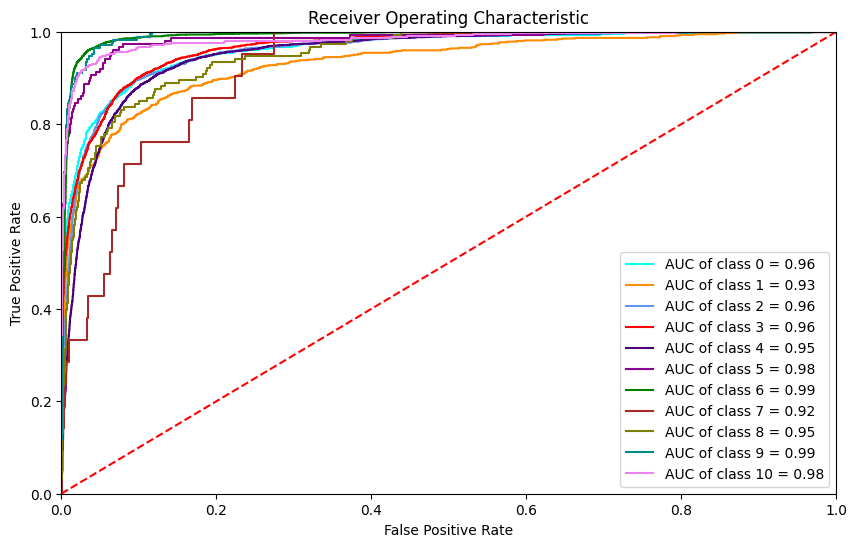

In [34]:
def plot_auc(labels, colours=['orange']):
    
    # Compute ROC curve and ROC area for each class
    n_classes = len(category_to_id)
    # print(n_classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC

    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:,i], y_score[:, i])
    #     print(fpr[i], tpr[i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(10,6))
    for i, color in zip(range(n_classes), colours):
        plt.plot(fpr[i], tpr[i], color = color, label = 'AUC of class {0} = {1:0.2f}'.format(i,roc_auc[i]))
        
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
 
colours = ['aqua', 'darkorange', 'cornflowerblue','r','indigo','darkmagenta','green','brown','olive','darkcyan','violet']
plot_auc(y, colours)    # in place of probabilities we can put y_score of decision function as well. will get a same result.

# Model 2

# Compute a weighted model

Recall that a falsely classifying a some categorical product customer as different category, cost high to bank and followup time to customers increses. Given this situation, the results of the first model are not that good. There are two reasons for this:

1.The class imbalance in the label has biased the training of the model.
2. Nothing has been done to weight the results toward correctly classifying perticular product category data.
One approach to these problems is to weight the classes when computing the logistic regression model. The code in the cell below adds a class_weight argument to the call to the LogisticRegression function. In this case weights are chosen as 5 for class 5, 8, 9 and 20 for class 7 

Note: default class_weights are 1

In [50]:
from collections import Counter
Counter(train_y)

Counter({6: 11978,
         3: 10024,
         2: 6314,
         4: 14056,
         8: 573,
         1: 2932,
         0: 4556,
         5: 516,
         10: 1713,
         9: 693,
         7: 89})

In [51]:
model = linear_model.LogisticRegression(class_weight = {8:5, 9:5, 5:5, 7:20}).fit(xtrain_tfidf, train_y)
model

/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={5: 5, 7: 20, 8: 5, 9: 5})

Accuracy:  0.8485256698099087
                         precision    recall  f1-score   support

        Debt collection       0.85      0.77      0.81      1155
          Consumer Loan       0.82      0.62      0.71       746
               Mortgage       0.83      0.80      0.81      1615
            Credit card       0.85      0.85      0.85      2502
       Credit reporting       0.83      0.88      0.85      3496
           Student loan       0.70      0.76      0.73       150
Bank account or service       0.93      0.95      0.94      2941
            Payday loan       0.16      0.29      0.21        21
        Money transfers       0.45      0.59      0.51       153
Other financial service       0.71      0.86      0.78       168
           Prepaid card       0.91      0.80      0.86       415

               accuracy                           0.85     13362
              macro avg       0.73      0.74      0.73     13362
           weighted avg       0.85      0.85      0.85    

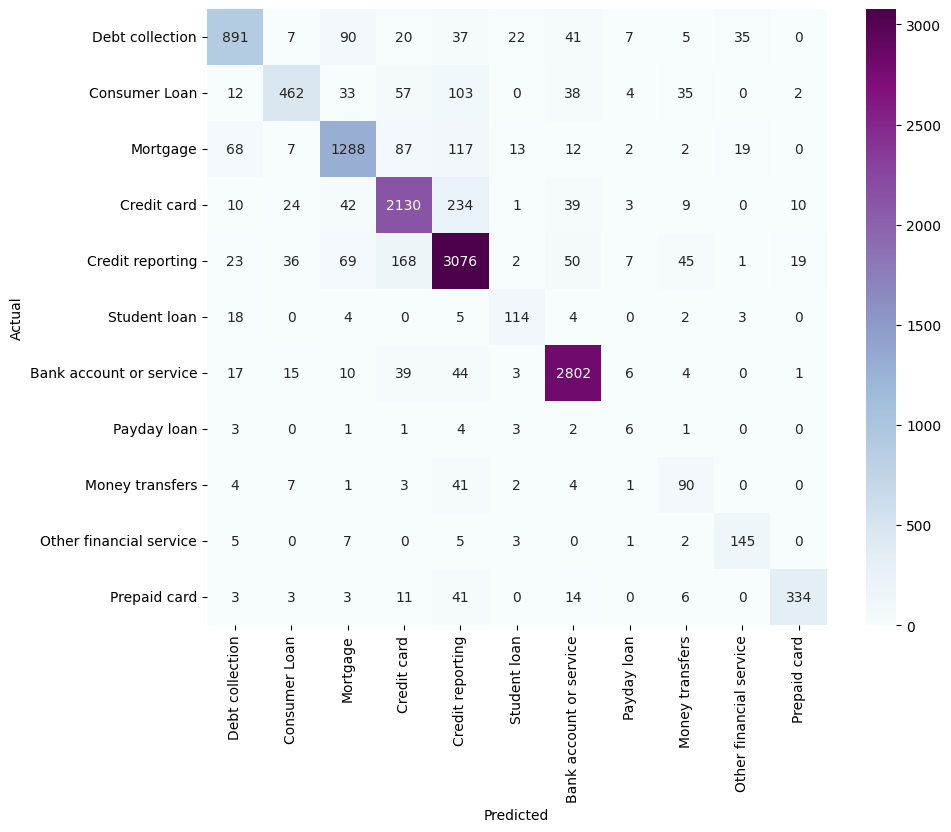

In [52]:
accuracy()
heat_conf()

The accuracy is slightly changed with respect to the unweighted model. The change could be more had we give more weights to Payday Loan, Money Transfers, Other financial services of the class than what we did here. The precision, recall and F1 are slightly better for the these cases. Reweighting the labels has moved the results in the desired direction, at least a bit.

The trade-off between true positive and false positive is similar to the unweighted model.

In [53]:
y_score = model.decision_function(xvalid_tfidf)
print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
print(predictions[:15])

[[-2.37397940e-01 -2.14699517e-01  5.55086104e-01  9.86521756e-01
   3.86531935e+00 -9.37743056e-01  5.32777206e-01 -1.73845369e+00
  -7.93137638e-01 -1.48073063e+00 -5.37541948e-01]
 [-1.14488595e+00 -9.37134246e-01 -5.05884860e-01  9.88902955e-01
   1.15060212e+00 -1.46788585e+00  7.60761549e+00 -1.12486656e+00
  -2.10544936e+00 -3.04327154e+00  5.82257806e-01]
 [ 1.09991868e+00  8.42394261e-01  3.19687758e+00 -7.12628308e-01
   2.79728188e+00 -1.59970229e+00 -1.40312022e-01 -3.29981726e+00
  -6.26169713e-01 -8.39652352e-01 -7.18190456e-01]
 [-1.52145234e+00  4.16534362e-01  1.16210227e-01  6.74744804e+00
   4.90513274e+00 -2.60861550e+00 -7.60779927e-01 -1.24902618e+00
  -1.97759712e+00 -2.70054403e+00 -1.36731027e+00]
 [-5.61007024e-01 -9.17667719e-02 -1.04109101e+00  3.75372906e+00
   2.70696255e+00 -1.18969187e+00  1.16010785e+00 -1.22650716e+00
  -1.13427671e+00 -1.56259868e+00 -8.13860229e-01]
 [-3.39117164e-01  2.63335528e+00  6.67746852e+00 -1.01848801e+00
   2.72967999e-03 -

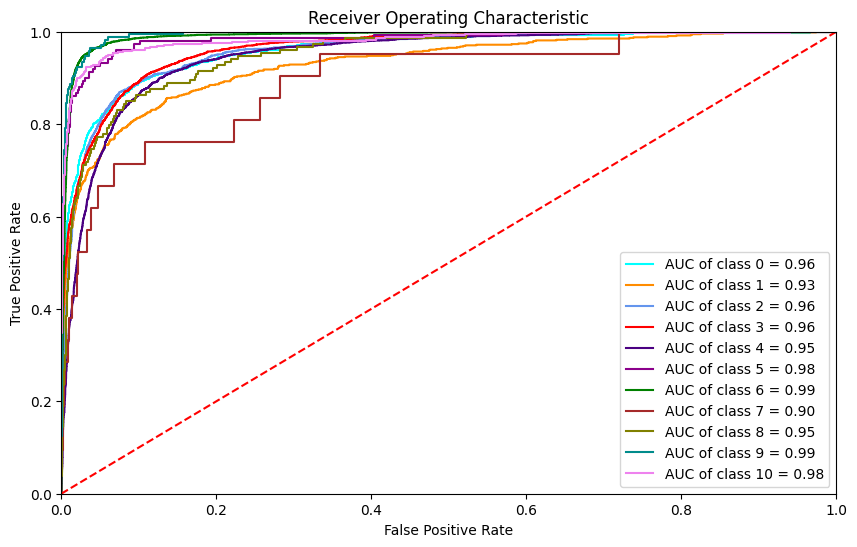

In [54]:
plot_auc(y, colours)    # in place of probabilities we can put y_score of decision function as well. will get a same result.

# Predictions

In [55]:
texts = ['This account popped up on my credit and it is not mines. I have filled out all the correct docs to show that i am victim of identity thief and will attach the ftc report with this complaint. Please block and remove this from my credit please XXXX XXXX XXXX Account Number: XXXX XXXX / 2019']
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
# print(predictions)
print(texts)
print("   -Predicted as: {}".format(category_to_id[predictions[0]]))

['This account popped up on my credit and it is not mines. I have filled out all the correct docs to show that i am victim of identity thief and will attach the ftc report with this complaint. Please block and remove this from my credit please XXXX XXXX XXXX Account Number: XXXX XXXX / 2019']
   -Predicted as: Credit card


In [56]:
texts = [". I have been trying to work with Citi mortgage to obtain a loan modification to stay in my home. However they have not been willing to help me. There service department has lost my file XXXX different times and claimed that I never started a loan modification. They have issued me just in the last seven months XXXX different customer support specialist ( XXXX XXXX ) Which would not return my phone calls and would not return email in a timely manner. Out of the blue they pulled her out of the case and then we got ( XXXX XXXX ), which seemed to be very kind, understanding, and very accommodating. With XXXX, over the last several months we were able to get all of the documentation to her in order to complete the loan modification. XXXX indicated that she has submitted all the paperwork to underwriting department. XXXX gave me the reassurance that she would do anything that she could to keep me in my home. Citi Mortgage went ahead again and switched customer support specialist to ( XXXX XXXX ) which will not return our phone calls or emails. I have called her everyday, I was lucky one day and she actually picked up the phone. She asked my information and my loan number, as soon as she identified who I was she stated that she was on the other line. It has been over a week and I have still have n't heard back from XXXX. I just received a letter from XXXX and XXXX, which is a firm that has been retained to conduct a non judicial foreclosure sale. I am absolutely shocked, I was just told thirty days ago that all of the paperwork that I submitted looked very good and they were going to do anything to keep me in my home. Now my case has been sent over to a law firm for foreclosure proceedings. I know this is definitely against the law, and they are commiting fraud. they have not tried to help me, they do n't communicate with me, they keep switching my file around to different individuals within the company with no resolution."] 

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
# print(predictions)
print(texts)
print("   -Predicted as: {}".format(category_to_id[predictions[0]]))

[". I have been trying to work with Citi mortgage to obtain a loan modification to stay in my home. However they have not been willing to help me. There service department has lost my file XXXX different times and claimed that I never started a loan modification. They have issued me just in the last seven months XXXX different customer support specialist ( XXXX XXXX ) Which would not return my phone calls and would not return email in a timely manner. Out of the blue they pulled her out of the case and then we got ( XXXX XXXX ), which seemed to be very kind, understanding, and very accommodating. With XXXX, over the last several months we were able to get all of the documentation to her in order to complete the loan modification. XXXX indicated that she has submitted all the paperwork to underwriting department. XXXX gave me the reassurance that she would do anything that she could to keep me in my home. Citi Mortgage went ahead again and switched customer support specialist to ( XXXX 

# Model 3

# Support Vector machine model¶

 5 fold cross validation is used since training SVMs are computationally intensive to train. Additional folds would give better estimates but at the cost of greater computation time. Execute the code in the cell below to define inside and outside fold objects.

In [42]:
nr.seed(248)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(135)
outside = ms.KFold(n_splits=5, shuffle = True)

In [43]:
Labels = preprocessing.label_binarize(Labels1, classes=[0,1,2,3,4,5,6,7,8,9,10])
print(Labels)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The code in the cell below estimates the best hyperparameters using 5 fold cross validation. There are two points to notice here
1. In this case, a grid of two hyperparameters: C is the inverse of lambda of l2 regularization, and kernel Specifies the kernel type to be used in the algorithm. 
2. Since there is a class imbalance and a difference in the cost to the bank of misclassification of a customer complaints, class weights are used. 
3. The model is fit on the grid and the best estimated hyperparameters are printed. 

In [44]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"estimator__C": [1, 10, 100, 1000]}
## Define the SVM model
svc_clf = svm.LinearSVC() 

svc_multi_clf = multiclass.OneVsRestClassifier(svc_clf)
## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_multi_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_params_)

/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Convergenc

/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Convergenc

/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/sasi/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Convergenc

{'estimator__C': 1}


In [45]:
model = svm.LinearSVC(class_weight={8:5, 9:5, 5:5, 7:20}).fit(xtrain_tfidf, train_y)  

Accuracy:  0.8487501870977399
                         precision    recall  f1-score   support

        Debt collection       0.82      0.77      0.80      1155
          Consumer Loan       0.78      0.62      0.70       746
               Mortgage       0.82      0.81      0.81      1615
            Credit card       0.85      0.86      0.85      2502
       Credit reporting       0.83      0.88      0.85      3496
           Student loan       0.75      0.66      0.70       150
Bank account or service       0.93      0.96      0.94      2941
            Payday loan       0.27      0.14      0.19        21
        Money transfers       0.46      0.45      0.46       153
Other financial service       0.73      0.80      0.77       168
           Prepaid card       0.89      0.83      0.86       415

               accuracy                           0.85     13362
              macro avg       0.74      0.71      0.72     13362
           weighted avg       0.85      0.85      0.85    

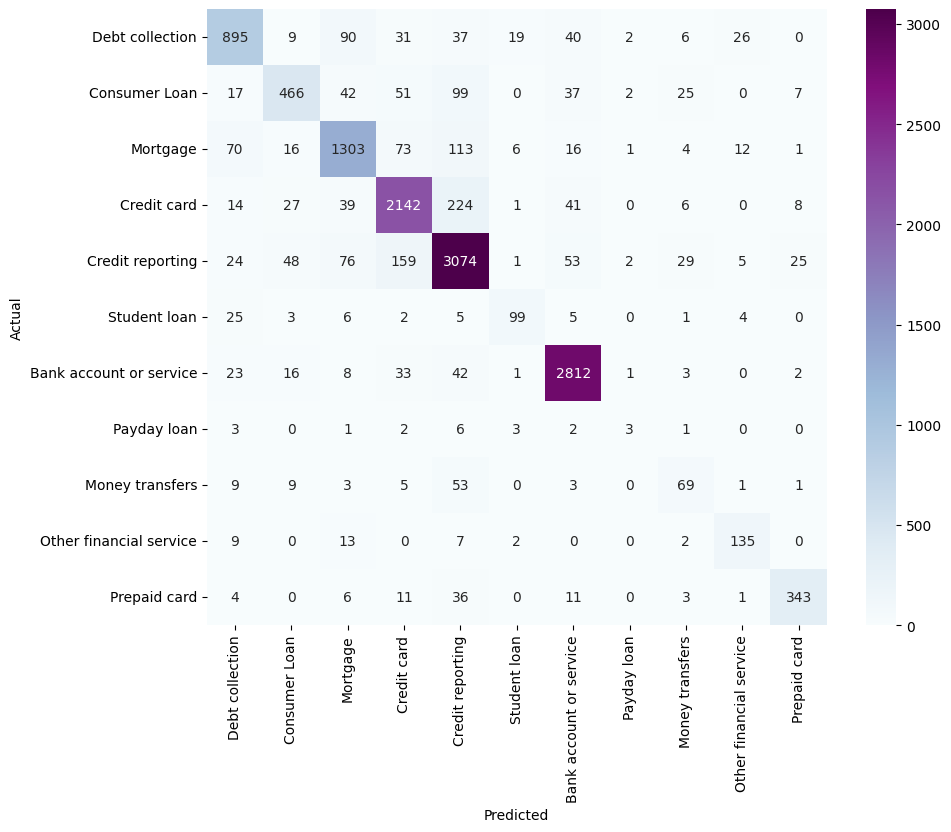

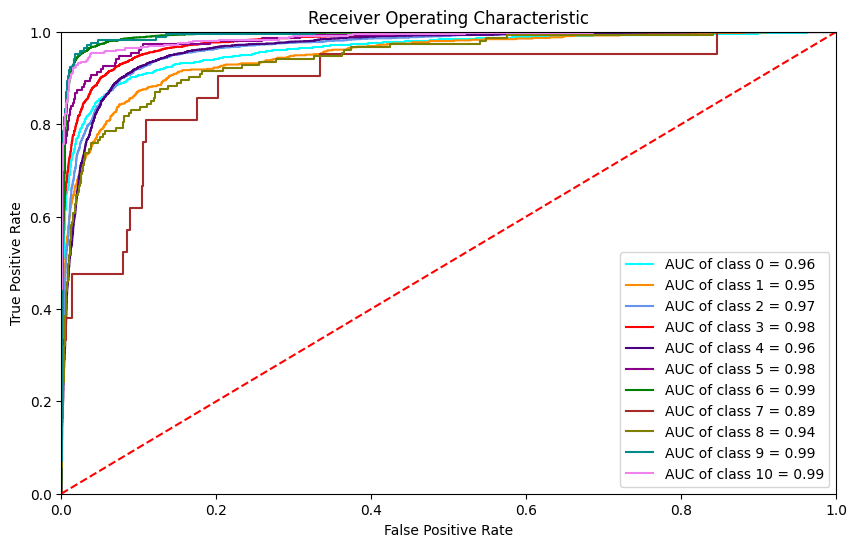

In [46]:
accuracy()
heat_conf()
y_score = model.decision_function(xvalid_tfidf)
# print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
# print(predictions[:15])
    
plot_auc(y,colours) 

# model saving

In [47]:
import pickle
# open a file where you want to store the data
file = open('customer_classification_model_svm.pkl','wb')
# Dump information to that file
pickle.dump(model, file)

# Predictions-svm

In [48]:
texts = ['This account popped up on my credit and it is not mines. I have filled out all the correct docs to show that i am victim of identity thief and will attach the ftc report with this complaint. Please block and remove this from my credit please XXXX XXXX XXXX Account Number: XXXX XXXX / 2019']
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
# print(predictions)
print(texts)
print("   -Predicted as: {}".format(category_to_id[predictions[0]]))

['This account popped up on my credit and it is not mines. I have filled out all the correct docs to show that i am victim of identity thief and will attach the ftc report with this complaint. Please block and remove this from my credit please XXXX XXXX XXXX Account Number: XXXX XXXX / 2019']
   -Predicted as: Credit card


In [49]:
texts = [". I have been trying to work with Citi mortgage to obtain a loan modification to stay in my home. However they have not been willing to help me. There service department has lost my file XXXX different times and claimed that I never started a loan modification. They have issued me just in the last seven months XXXX different customer support specialist ( XXXX XXXX ) Which would not return my phone calls and would not return email in a timely manner. Out of the blue they pulled her out of the case and then we got ( XXXX XXXX ), which seemed to be very kind, understanding, and very accommodating. With XXXX, over the last several months we were able to get all of the documentation to her in order to complete the loan modification. XXXX indicated that she has submitted all the paperwork to underwriting department. XXXX gave me the reassurance that she would do anything that she could to keep me in my home. Citi Mortgage went ahead again and switched customer support specialist to ( XXXX XXXX ) which will not return our phone calls or emails. I have called her everyday, I was lucky one day and she actually picked up the phone. She asked my information and my loan number, as soon as she identified who I was she stated that she was on the other line. It has been over a week and I have still have n't heard back from XXXX. I just received a letter from XXXX and XXXX, which is a firm that has been retained to conduct a non judicial foreclosure sale. I am absolutely shocked, I was just told thirty days ago that all of the paperwork that I submitted looked very good and they were going to do anything to keep me in my home. Now my case has been sent over to a law firm for foreclosure proceedings. I know this is definitely against the law, and they are commiting fraud. they have not tried to help me, they do n't communicate with me, they keep switching my file around to different individuals within the company with no resolution."] 

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
# print(predictions)
print(texts)
print("   -Predicted as: {}".format(category_to_id[predictions[0]]))

[". I have been trying to work with Citi mortgage to obtain a loan modification to stay in my home. However they have not been willing to help me. There service department has lost my file XXXX different times and claimed that I never started a loan modification. They have issued me just in the last seven months XXXX different customer support specialist ( XXXX XXXX ) Which would not return my phone calls and would not return email in a timely manner. Out of the blue they pulled her out of the case and then we got ( XXXX XXXX ), which seemed to be very kind, understanding, and very accommodating. With XXXX, over the last several months we were able to get all of the documentation to her in order to complete the loan modification. XXXX indicated that she has submitted all the paperwork to underwriting department. XXXX gave me the reassurance that she would do anything that she could to keep me in my home. Citi Mortgage went ahead again and switched customer support specialist to ( XXXX 